# Importing libraries

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Downloading the dataset

In [2]:
url_movies = 'https://raw.githubusercontent.com/gabrielatrindade/movies_tmdb_pyladies_bootcamp/master/dataset/tmdb_5000_movies_v2.csv'

tmdb_movies = pd.read_csv(url_movies)

#tmdb_movies.head(2)

In [3]:
url_credits = 'https://raw.githubusercontent.com/gabrielatrindade/movies_tmdb_pyladies_bootcamp/master/dataset/tmdb_5000_credits_v2.csv'

tmdb_credits = pd.read_csv(url_credits, index_col=0)

#tmdb_credits.head(2)

# Data Inicial Exploration

### tmdb_movies

In [4]:
tmdb_movies.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500


 - Here we can see some JSON columns that should be cleaned.

In [5]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
original_language       4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(6)
memory usage: 487.9+ KB


- Missing values in `release_date` and `run_time`.

In [6]:
tmdb_movies[['budget','popularity', 'revenue', 'vote_average', 'vote_count']].describe()

,budget,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000


- `vote_average` is between 0 and 10.
- `vote_count` min is 0, in other words, there is at least one movie without vote.

### tmdb_credits

In [7]:
tmdb_credits.head(2)

,movie_id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End


In [8]:
tmdb_credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 2 columns):
movie_id    4803 non-null int64
title       4803 non-null object
dtypes: int64(1), object(1)
memory usage: 112.6+ KB


- no missing values.

# Cleaning JSON columns

Changes to make in the future: <br> 
1. Create different dataframes with `names` and (`ids` or `iso`) for each json_column <br>
2. Use the (`ids` or `iso`) on the tmbd_movies <br>
3. To check what does represent that (`ids` or `iso`) make merge and get the `name`

In [9]:
def transform_json_column_to_series(series: pd.Series) -> pd.Series:
    '''get the name key of json column and put in a list'''
    all_rows = []
    for row in series:
        column_name = (json.loads(row))
        column_name_list = [e['name'] for e in column_name]
        all_rows.append(column_name_list)
    return pd.Series(all_rows)

### genres

In [10]:
tmdb_movies['genres'][1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [11]:
tmdb_movies['genres'].update(transform_json_column_to_series(tmdb_movies['genres']))

In [12]:
#tmdb_movies.head(2)

### production_companies

In [13]:
tmdb_movies['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [14]:
tmdb_movies['production_companies']\
.update(transform_json_column_to_series(tmdb_movies['production_companies']))

In [15]:
#tmdb_movies.head(2)

### production_countries

In [16]:
tmdb_movies['production_countries']\
.update(transform_json_column_to_series(tmdb_movies['production_countries']))

In [17]:
#tmdb_movies.head(2)

### spoken_languages

In [18]:
tmdb_movies['spoken_languages']\
.update(transform_json_column_to_series(tmdb_movies['spoken_languages']))

In [19]:
tmdb_movies.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],6.9,4500


# Feature Engineering

### profit

In [20]:
tmdb_movies['profit'] = tmdb_movies.apply(
    lambda row: (row['revenue'] - row['budget']), axis=1)

In [21]:
tmdb_movies.head()

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800,2550965087
1,300000000,"[Adventure, Fantasy, Action]",285,en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],6.9,4500,661000000
2,245000000,"[Action, Adventure, Crime]",206647,en,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",6.3,4466,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],7.6,9106,834939099
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],6.1,2124,24139100


### quantity of genres, production_companies, production_countries, spoken_languages

creating these features to see if there are some correlation between them and the older ones.

In [22]:
def create_count_series(column_name: str) -> pd.Series:
    count = []
    for index in range(0, len(tmdb_movies)):
        count.append(len(tmdb_movies[column_name][index]))
    name_series = column_name+'_count'
    count = pd.Series(count, name=name_series)
    return (count)

In [23]:
genres_count = create_count_series('genres')
companies_count = create_count_series('production_companies')
production_countries_count = create_count_series('production_countries')
spoken_language_count = create_count_series('spoken_languages')

tmdb_movies = pd.concat([tmdb_movies, genres_count, companies_count, 
                         production_countries_count, spoken_language_count], 
                        axis=1)

In [24]:
tmdb_movies.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,profit,genres_count,production_companies_count,production_countries_count,spoken_languages_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800,2550965087,4,4,2,2
1,300000000,"[Adventure, Fantasy, Action]",285,en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],6.9,4500,661000000,3,3,1,1


# Merging the dataframes

In [25]:
tmdb = tmdb_credits.merge(tmdb_movies, left_on='movie_id', right_on='id')

In [26]:
tmdb.head(2)

,movie_id,title,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,profit,genres_count,production_companies_count,production_countries_count,spoken_languages_count
0,19995,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800,2550965087,4,4,2,2
1,285,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",285,en,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],6.9,4500,661000000,3,3,1,1


# Questions

### 01 - Is there some correlation between: budget, popularity, revenue, vote_average, vote_count  and profit?

In [27]:
tmdb_movies_features_corr = (tmdb_movies[['budget', 'popularity', 'revenue', 
                                          'vote_average', 'vote_count', 'profit']]
                             .corr())

In [28]:
tmdb_movies_features_corr

,budget,popularity,revenue,vote_average,vote_count,profit
budget,1.000000,0.505414,0.730823,0.093146,0.593180,0.575852
popularity,0.505414,1.000000,0.644724,0.273952,0.778130,0.620854
revenue,0.730823,0.644724,1.000000,0.197150,0.781487,0.978881
vote_average,0.093146,0.273952,0.197150,1.000000,0.312997,0.208241
vote_count,0.593180,0.778130,0.781487,0.312997,1.000000,0.758379
profit,0.575852,0.620854,0.978881,0.208241,0.758379,1.000000


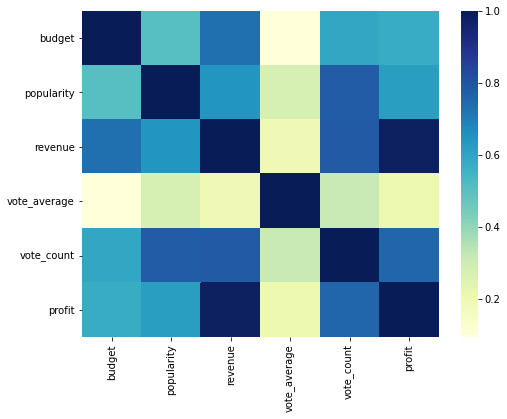

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(tmdb_movies_features_corr, cmap="YlGnBu")

plt.show()

As we can see, there is a **strong(~0.8)** correlation between: <br>
- `profit` and `revenue`: that makes sense, because the *profit = revenue - budget*. So if `revenue` increases, `profit` also increases.
- `profit` and `vote_count`: if people are voting, they watched the movie. If they watched the movie, they make money (profit) to the company.
- `vote_count` and `popularity`: that makes sense, after all, a lot of votes means that a lot of people watched, so it's a popular movie.
- `vote_count` and `revenue`: as `vote_count` is related with profit, it'll also related with `revenue`, because of *profit = revenue - budget*.

And it's also possible realized a **weak(<0.1)** correlation between: <br>
- `vote_average` and `budget`: So, doesn't matter the `budget`, it probably will not interfere on the `vote_average`.

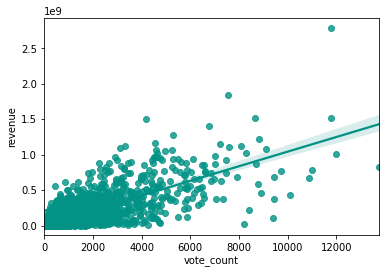

In [30]:
#tmdb.plot(kind='scatter',x='vote_count',y='revenue',color='black')
sns.regplot(tmdb['vote_count'],tmdb['revenue'], color='xkcd:teal')
plt.show()

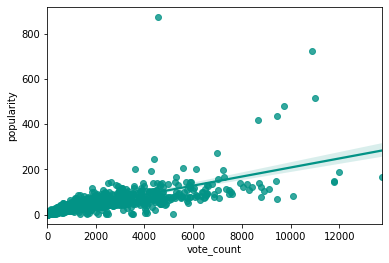

In [31]:
#tmdb.plot(kind='scatter',x='vote_count',y='popularity',color='black')
sns.regplot(tmdb['vote_count'],tmdb['popularity'], color='xkcd:teal')
plt.show()

Through the scatter plot is also possible to see the correlation between 2 variables. <br>
In these graphs above we can see how `vote_count` is related with `popularity` and `revenue`, as we saw in the heatmap. **The trend line shows us the positive correlation (as one variable increases, the other also increases)**.

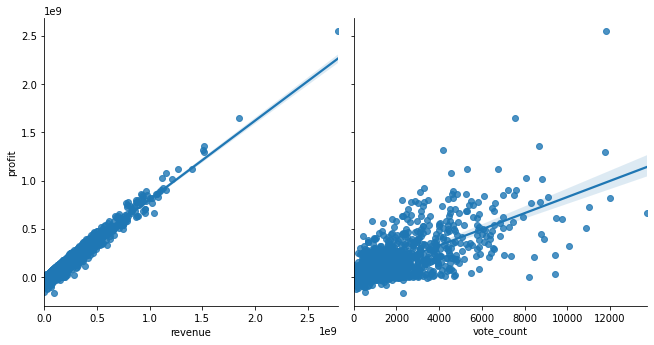

In [70]:
sns.pairplot(tmdb_movies, kind='reg',
            y_vars=['profit'], x_vars=['revenue', 'vote_count'],
            height=4.5)
plt.show()

In the same way, we can see how `profit` is related with `revenue` and `vote_count`, as we also saw in the heatmap. **The trend line shows us the positive correlation (as one variable increases, the other also increases)**.

But, on the other hand...

In [116]:
tmdb_movies_features_corr_2 = (tmdb_movies[['budget', 'popularity', 'revenue', 
                                            'vote_average', 'vote_count', 'profit',
                                            'genres_count', 'production_companies_count', 
                                            'production_countries_count', 'spoken_languages_count']]
                               .corr().iloc[:5,6:])

tmdb_movies_features_corr_2

,genres_count,production_companies_count,production_countries_count,spoken_languages_count
budget,0.269170,0.222978,0.116561,0.123090
popularity,0.154918,0.190863,0.085705,0.069893
revenue,0.182185,0.130154,0.047778,0.096749
vote_average,0.085577,0.153864,0.125642,0.138811
vote_count,0.154000,0.180654,0.071775,0.096449


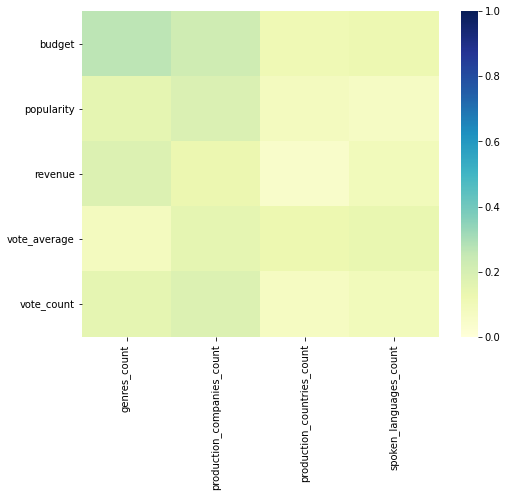

In [118]:
plt.figure(figsize=(8,6))
sns.heatmap(tmdb_movies_features_corr_2, cmap="YlGnBu", 
            vmin=0, vmax=1)

plt.show()

With the other **features created (count ones), there is no strong correlation**. So we cannot related the quantity of (genres or production_companies or production_countries or spoken_languagens) with (profit, vote_count, vote_average, revenue, popularity, and budget).

### 02 - `(a)` Which movies have the highest vote_average? `(b)` Is the vote_count significant for these movies?

In [35]:
def add_labels_to_bars(ax, series: pd.Series, distance_bar: float):
    '''get a plot and a Series that represent the labels
    and then add the labels to bar tops
    distance_bar = label distance from bar top'''
    
    i=0
    for p in ax.patches:
        height = p.get_height() + distance_bar
        ax.text(p.get_x()+p.get_width()/2., height,
                series[i], fontsize=12,
                ha="center")
        i += 1

In [36]:
# I need to change the color bars, bars with the same label should have the same color

def bar_plot_configured(series_x: pd.Series, series_y: pd.Series, series_label: pd.Series):
    x = series_x
    y = series_y

    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5))
    
    palette = sns.color_palette("YlGnBu_r", len(x)+2)
    rank = series_label.argsort().argsort() 

    ax = sns.barplot(x, y, palette=np.array(palette[::-1])[rank])
    return ax

In [37]:
movies_highest_average_ten_firsts = (tmdb[['title', 'vote_average', 'vote_count']]
                                         .sort_values('vote_average', ascending=False)
                                     .head(10).reset_index(drop=True))

movies_highest_average_ten_firsts

,title,vote_average,vote_count
0,Stiff Upper Lips,10.0,1
1,Me You and Five Bucks,10.0,2
2,"Dancer, Texas Pop. 81",10.0,1
3,Little Big Top,10.0,1
4,Sardaarji,9.5,2
5,One Man's Hero,9.3,2
6,There Goes My Baby,8.5,2
7,The Shawshank Redemption,8.5,8205
8,The Prisoner of Zenda,8.4,11
9,The Godfather,8.4,5893


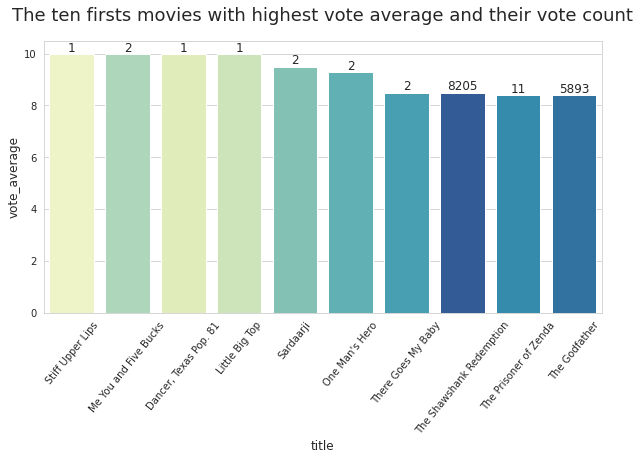

In [38]:
ax = bar_plot_configured(movies_highest_average_ten_firsts['title'], 
                         movies_highest_average_ten_firsts['vote_average'],
                         movies_highest_average_ten_firsts['vote_count'])

add_labels_to_bars(ax, movies_highest_average_ten_firsts['vote_count'], 0.1)

plt.xticks(rotation=51)
plt.title("The ten firsts movies with highest vote average and their vote count", fontsize=18, pad=20)
plt.xlabel('title', fontsize=12)
plt.ylabel('vote_average', fontsize=12)
plt.show()

As we're seeing the four first movies have just 1 or 2 votes which is not a significant number of votes. So they don't deserve to be considered as the highest `vote_average`.

**Make a hypothesis test to prove that 1 or 2 votes are not significant**

## 03 - `a` Which movies people voted the most? `b` Are their vote_average good? `c` Is there some correlation?

In [406]:
movies_most_voted_ten_firsts = (tmdb[['title', 'vote_count', 'vote_average']]
                                    .sort_values('vote_count', ascending=False)
                                    .head(10).reset_index(drop=True))

movies_most_voted_ten_firsts

,title,vote_count,vote_average
0,Inception,13752,8.1
1,The Dark Knight,12002,8.2
2,Avatar,11800,7.2
3,The Avengers,11776,7.4
4,Deadpool,10995,7.4
5,Interstellar,10867,8.1
6,Django Unchained,10099,7.8
7,Guardians of the Galaxy,9742,7.9
8,The Hunger Games,9455,6.9
9,Mad Max: Fury Road,9427,7.2


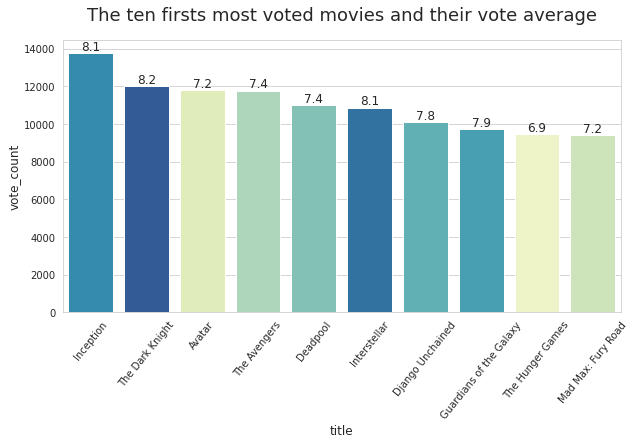

In [282]:
ax = bar_plot_configured(movies_most_voted_ten_firsts['title'], 
                         movies_most_voted_ten_firsts['vote_count'],
                         movies_most_voted_ten_firsts['vote_average'])

add_labels_to_bars(ax, movies_most_voted_ten_firsts['vote_average'], 157)

plt.xticks(rotation=51)
plt.title("The ten firsts most voted movies and their vote average", fontsize=18, pad=20)
plt.xlabel('title', fontsize=12)
plt.ylabel('vote_count', fontsize=12)
plt.show()

`b`: Yes, they have a good vote_average. (define what is good)

In [220]:
tmdb_movies[['vote_average', 'vote_count']].corr()

,vote_average,vote_count
vote_average,1.000000,0.312997
vote_count,0.312997,1.000000


`c`: The correlation between `vote_count` and `vote_average` is weak.

**Which movie have the most budget?**

In [ ]:
tmdb[['title', 'budget']].sort_values('budget', ascending=False).head(10)

**Which movie has the most popularity?**

In [ ]:
tmdb[['title', 'popularity']].sort_values('popularity', ascending=False).head(10)

**Which production_companies have the most movies?**

In [413]:
list_productions = []

for list_x in tmdb['production_companies']:
    list_productions += list_x

values, counts = np.unique(list_productions, return_counts=True)

pd.DataFrame({'companies': values, 'count': counts}).sort_values('count', ascending=False).head(3)
#pd.get_dummies(str(tmdb['production_companies'][0]).strip('[]').split(','))

,companies,count
4827,Warner Bros.,319
4680,Universal Pictures,311
3362,Paramount Pictures,285


In [422]:
list_productions = []

for list_x in tmdb['production_companies']:
    list_productions += list_x

productions_df = pd.DataFrame(list_productions, columns=['production_companies'])
productions_df['production_companies'].value_counts().head()

Warner Bros.                              319
Universal Pictures                        311
Paramount Pictures                        285
Twentieth Century Fox Film Corporation    222
Columbia Pictures                         201
Name: production_companies, dtype: int64

**Which production_companies have the highest budget?**

**Which production_companies have the highest revenue?**

**Which genres have the best popularity?**

**Which spoken_languages have the highest popularity?**